In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def logFit(x,y):
    # cache some frequently reused terms
    sumy = np.sum(y)
    sumlogx = np.sum(np.log(x))

    b = (x.size*np.sum(y*np.log(x)) - sumy*sumlogx)/(x.size*np.sum(np.log(x)**2) - sumlogx**2)
    a = (sumy - b*sumlogx)/x.size

    return a, b

def logFunc(x, a, b):
    return a + b*np.log(x)

In [16]:
df_35 = pd.read_csv(r'C:\Users\sacchi_r\Documents\GitHub\carculator_truck\dev\Class2_RigidTruck_ENG_35_Urban_delivery_1Hz_full.vmod',
                 sep=",", header=1)

df_26 = pd.read_csv(r'C:\Users\sacchi_r\Documents\GitHub\carculator_truck\dev\Class2_RigidTruck_ENG_260_Urban_Delivery_1Hz_full.vmod',
                 sep=",", header=1)

df_40 = pd.read_csv(r'C:\Users\sacchi_r\Documents\GitHub\carculator_truck\dev\Class5_Tractor_ENG_400_Urban_delivery_1Hz_full.vmod',
                 sep=",", header=1)

In [17]:
df_35["engine power ratio"] = df_35["P_eng_fcmap [kW]"]/175
df_26["engine power ratio"] = df_26["P_eng_fcmap [kW]"]/175
df_40["engine power ratio"] = df_40["P_eng_fcmap [kW]"]/325

In [18]:
df_35["wheel power ratio"] = df_35["P_brake_in [kW]"]/175
df_26["wheel power ratio"] = df_26["P_brake_in [kW]"]/175
df_40["wheel power ratio"] = df_40["P_brake_in [kW]"]/325

In [19]:
df_35["fuel power [kW]"] = df_35["FC-Final [g/h]"] /3600 * 42
df_26["fuel power [kW]"] = df_26["FC-Final [g/h]"] /3600 * 42
df_40["fuel power [kW]"] = df_40["FC-Final [g/h]"] /3600 * 42

df_35["P_ratio_fuel"] = (df_35["P_eng_out [kW]"] / df_35["fuel power [kW]"])
df_26["P_ratio_fuel"] = (df_26["P_eng_out [kW]"] / df_26["fuel power [kW]"])
df_40["P_ratio_fuel"] = (df_40["P_eng_out [kW]"] / df_40["fuel power [kW]"])

In [20]:
df_35["drivetrain_eff"] = df_35["P_brake_in [kW]"]/df_35["P_eng_out [kW]"]
df_26["drivetrain_eff"] = df_26["P_brake_in [kW]"]/df_26["P_eng_out [kW]"]
df_40["drivetrain_eff"] = df_40["P_brake_in [kW]"]/df_40["P_eng_out [kW]"]

(0, 1)

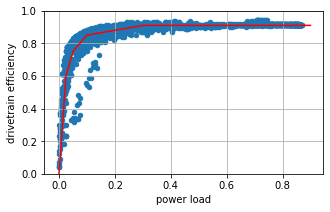

In [31]:
plt.rcParams["figure.figsize"] = (5,3)
df_40.loc[(~df_40["drivetrain_eff"].isnull())
         &(df_40["drivetrain_eff"]>0)
          &(df_40["drivetrain_eff"]<1)
         &(df_40["P_brake_in [kW]"]>0)].plot(x="wheel power ratio", y="drivetrain_eff", kind="scatter")

ind_trans_40 = df_40.loc[(~df_40["drivetrain_eff"].isnull())
         &(df_40["drivetrain_eff"]>0)
         &(df_40["drivetrain_eff"]<1)
         &(df_40["P_brake_in [kW]"]>0), "drivetrain_eff"]
vals_trans_40 = df_40.loc[(~df_40["drivetrain_eff"].isnull())
         &(df_40["drivetrain_eff"]>0)
         &(df_40["drivetrain_eff"]<1)
         &(df_40["P_brake_in [kW]"]>0), "wheel power ratio"]
xfit = np.linspace(0.01,1,100)
#plt.plot(xfit, logFunc(xfit, *logFit(vals_trans_40, ind_trans_40)), color="orange")

plt.plot(
        [0, 0.025, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9],
        [0, 0.6,   .75, .85, .88, .91, .91, .91, .91, .91, .91, .91],
        
         label="manual fit",
    c="red"
        )

plt.ylabel("drivetrain efficiency")
plt.xlabel("power load")
plt.grid()
plt.ylim(0, 1)

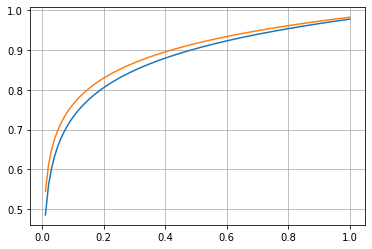

In [42]:
xfit = np.linspace(0.01,1,100)
plt.plot(xfit, logFunc(xfit, *logFit(vals_trans_26, ind_trans_26)))
plt.plot(xfit, logFunc(xfit, *logFit(vals_trans_40, ind_trans_40)))
plt.grid()

In [43]:
logFit(vals_trans_40, ind_trans_40)

(0.9828327428550044, 0.09517874859788354)

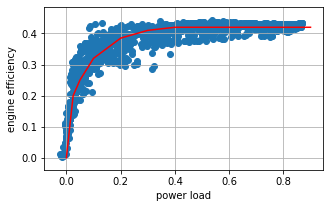

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(5,3), 
                        nrows=1, ncols=1, sharey=True     # fix as above
                        #gridspec_kw=dict(hspace=0.4)
                       ) # Much control of gridspec




ind_40 = df_40.loc[(df_40["P_ratio_fuel"]>0)
               &(df_40["P_ratio_fuel"]<.45)
                &(df_40["P_eng_fcmap [kW]"]>0),"P_ratio_fuel"]
vals_40 = df_40.loc[(df_40["P_ratio_fuel"]>0)
               &(df_40["P_ratio_fuel"]<.45)
                 &(df_40["P_eng_fcmap [kW]"]>0),"wheel power ratio"]


xfit = np.linspace(0.01,1,num=100)



axs.scatter(x=vals_40, y=ind_40)
#axs.plot(xfit, logFunc(xfit, *logFit(vals_40,ind_40)), c="orange")

plt.plot(
        [0, 0.025, .05, .1,  .2, .3, .4, .5, .6, .7, .8, .9],
        [0, 0.2,   .25, .32, .385, .41, .42, .42, .42, .42, .42, .42],
        
         label="manual fit",
    c="red"
        )

plt.ylabel("engine efficiency")
plt.xlabel("power load")
axs.grid()

In [64]:
np.interp(
    [.2, .22, .28, .42],
    [0, 0.025, .05, .1,  .2, .3, .4, .5, .6, .7, .8, .9],
    [0, 0.2,   .25, .32, .385, .41, .42, .42, .42, .42, .42, .42],
)

array([0.385, 0.39 , 0.405, 0.42 ])

In [45]:
logFit(vals_40,ind_40)

(0.4381717156936766, 0.05460550663733131)

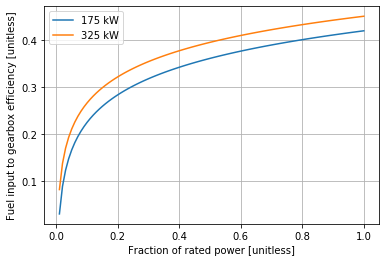

In [28]:
xfit = np.linspace(0.01,1,num=100)
plt.plot(xfit, logFunc(xfit, *logFit(vals_26,ind_26)), label="175 kW")
plt.plot(xfit, logFunc(xfit, *logFit(vals_40,ind_40)), label="325 kW")
plt.grid()

plt.xlabel("Fraction of rated power [unitless]")
plt.ylabel("Fuel input to gearbox efficiency [unitless]")
plt.legend()

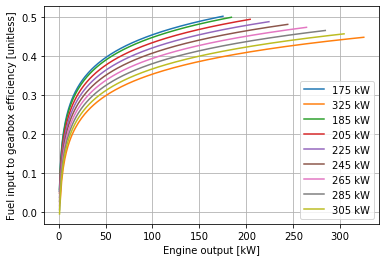

In [63]:
xfit = np.linspace(0,175,num=200)
plt.plot(xfit, logFunc(xfit, *logFit(vals_35,ind_35)), label="175 kW")
xfit = np.linspace(0,325,num=200)
plt.plot(xfit, logFunc(xfit, *logFit(vals_40,ind_40)), label="325 kW")
plt.grid()

plt.xlabel("Engine output [kW]")
plt.ylabel("Fuel input to gearbox efficiency [unitless]")

fit_35 = logFit(vals_35,ind_35)
fit_40 = logFit(vals_40,ind_40)

for p in np.arange(185, 320, 20):
    x_s=[]
    y_s=[]
    for u in np.arange(1, p):
        x_s.append(u)
        
        res = np.interp(p,[175, 325], [logFunc(u, fit_35[0], fit_35[1]), logFunc(u, fit_40[0], fit_40[1])])
        
        y_s.append(res)
    plt.plot(x_s, y_s, label=str(p) + " kW")
    
plt.legend()

In [1]:
from carculator_truck import *

In [2]:
tip = TruckInputParameters()
tip.static()
#tip.stochastic(5)
_, array = fill_xarray_from_input_parameters(tip)

In [3]:
#array = array.interp(year=[2020, 2021, 2025, 2030, 2040],  kwargs={'fill_value': 'extrapolate'})
array.loc[dict(parameter="capacity utilization")] = 1
array.loc[dict(parameter="auxilliary power base demand")] = 11500
array.loc[dict(parameter="power to mass ratio", size="40t", powertrain=["ICEV-d", "HEV-d"])] = 22.76
tm = TruckModel(array, cycle="Urban delivery", country="RER")
#tm.array.loc[dict(parameter="capacity utilization")] = 1
#tm.array.loc[dict(parameter="power to mass ratio", size="40t", powertrain=["ICEV-d", "HEV-d"])] = 22.76
tm.set_all()

Urban delivery driving cycle is selected. Vehicles will be designed to achieve a minimal range of 150 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+-----+-----+-----+-----+-----+
|                | 3.5t | 7.5t | 18t | 26t | 32t | 40t | 60t |
+----------------+------+------+-----+-----+-----+-----+-----+
|   BEV, 2000    | 1.0  | 1.0  | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
|   BEV, 2010    | 1.0  | 1.0  | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
|   BEV, 2020    | 1.0  | 1.0  | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
|   BEV, 2030    | 1.0  | 1.0  | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
|   BEV, 2040    | 1.0  | 1.0  | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
|   BEV, 2050    | 1.0  | 1.0  | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
|   FCEV, 2000   | 1.0  | 1.0  | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
|   FCEV, 2010   | 1.0  | 1.0  | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
|   FCEV, 2020   | 1.0  | 1.0  | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
|   FCEV, 2030   | 1.0  | 1.0  | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
|   FCEV, 2

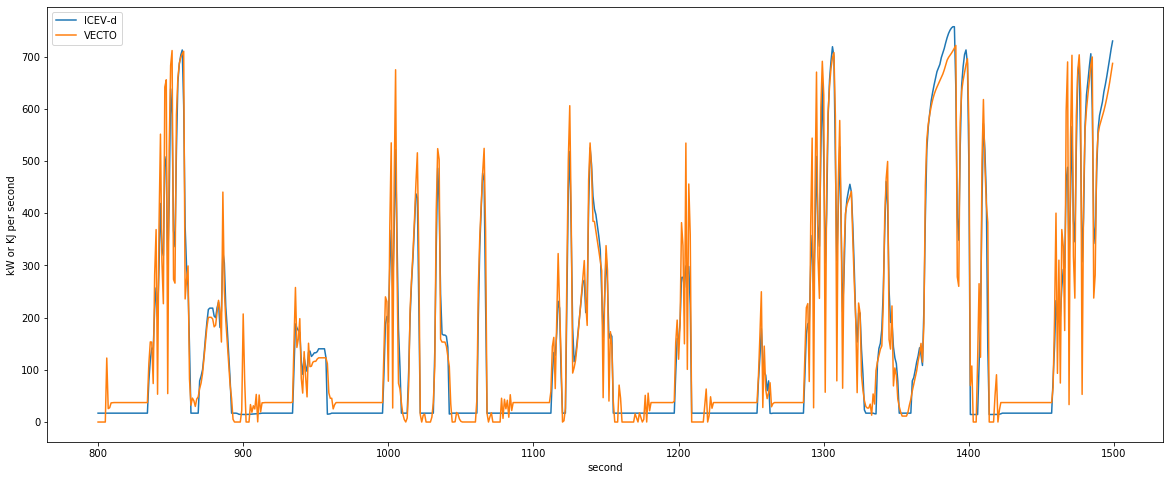

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(20,8), 
                        nrows=1, ncols=1, sharey=True     # fix as above
                        #gridspec_kw=dict(hspace=0.4)
                       ) # Much control of gridspec

fp = r'C:\Users\sacchi_r\Documents\GitHub\carculator_truck\dev\Class5_Tractor_ENG_400_Urban_delivery_1Hz_full.vmod'
#fp = r'C:\Users\sacchi_r\Documents\GitHub\carculator_truck\dev\Class5_Tractor_ENG_400_Long_haul+ES_1Hz_full.vmod'
df_40 = pd.read_csv(fp,
                 sep=",", header=1)

df_40["fuel power [kW]"] = df_40["FC-Final [g/h]"]/3600*42

axs.plot(tm.energy.sel(powertrain=["ICEV-d"],
                       size="40t",
                       year=2020,
                       value=0,
                       parameter=["motive energy", "auxiliary energy"],
                       second=range(800,1500)).sum(dim="parameter")\
    .to_dataframe("val").unstack()["val"].T, label="ICEV-d")


axs.plot(df_40["fuel power [kW]"][800:1500], label="VECTO")

plt.ylabel("kW or KJ per second")
plt.xlabel("second")

plt.legend()

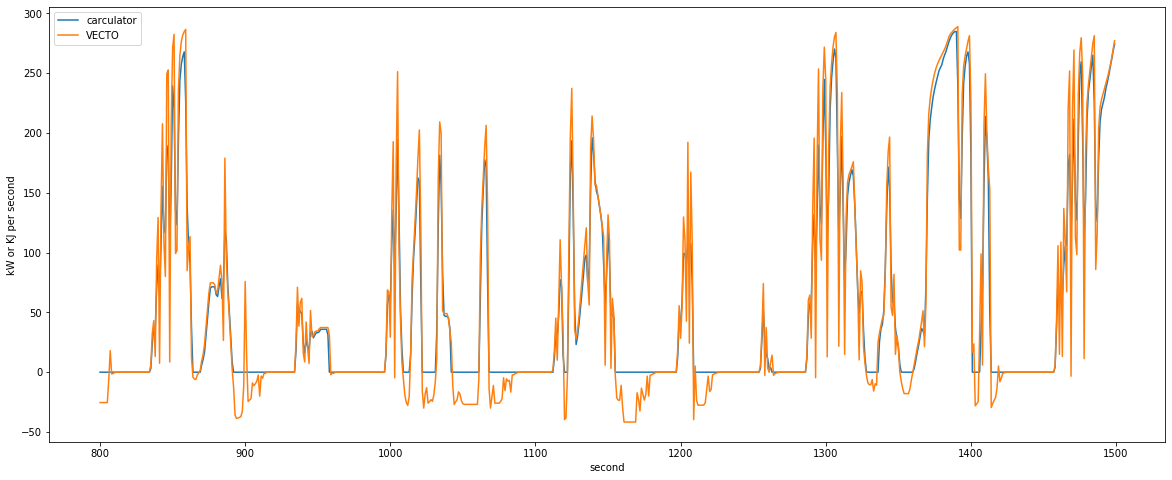

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(20,8), 
                        nrows=1, ncols=1, sharey=True     # fix as above
                        #gridspec_kw=dict(hspace=0.4)
                       ) # Much control of gridspec

fp = r'C:\Users\sacchi_r\Documents\GitHub\carculator_truck\dev\Class5_Tractor_ENG_400_Urban_delivery_1Hz_full.vmod'
#fp = r'C:\Users\sacchi_r\Documents\GitHub\carculator_truck\dev\Class5_Tractor_ENG_400_Long_haul+ES_1Hz_empty.vmod'
df_40 = pd.read_csv(fp,
                 sep=",", header=1)

df_40["fuel power [kW]"] = df_40["FC-AAUX [g/h]"]/3600*42

axs.plot(tm.energy.sel(powertrain=["ICEV-d"],
                       size="40t",
                       year=2020,
                       value=0,
                       parameter= "motive energy at wheels",
                       second=range(800,1500))\
    .to_dataframe("val").unstack()["val"].T, label="carculator")


axs.plot(df_40["P_axle_in [kW]"][800:1500], label="VECTO")

plt.ylabel("kW or KJ per second")
plt.xlabel("second")

plt.legend()

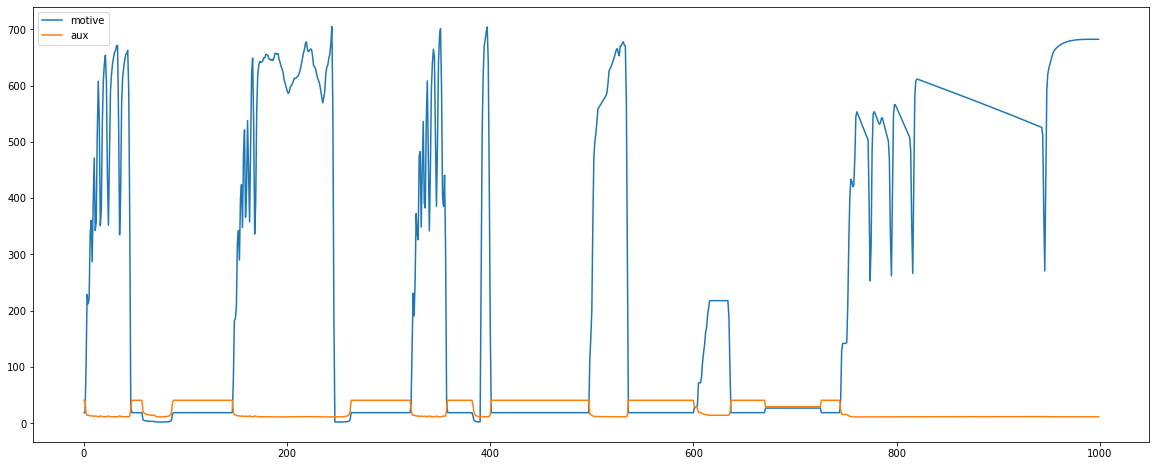

In [5]:
fig, ax = plt.subplots(figsize=(20,8), 
                        nrows=1, ncols=1, sharey=True     # fix as above
                        #gridspec_kw=dict(hspace=0.4)
                       ) # Much control of gridspec

ax.plot(
    tm.energy.sel(powertrain="ICEV-d",
                       size="40t",
                       year=2020,
                       value=0,
                       parameter="motive energy",
                       second=range(0,1000))\
    .to_dataframe("val").unstack()["val"].T, label="motive"
)

ax.plot(
    tm.energy.sel(powertrain="ICEV-d",
                       size="40t",
                       year=2020,
                       value=0,
                       parameter="auxiliary energy",
                       second=range(0,1000))\
    .to_dataframe("val").unstack()["val"].T, label="aux"
)
plt.legend()

In [10]:
cycle = get_standard_driving_cycle("Urban delivery")
velocity = (cycle * 1000) / 3600

In [12]:
velocity.shape

(3413, 7)

array([ 2.30869444,  2.78372222,  3.72458333,  4.10108333,  4.35858333,
        5.22605556,  5.86302778,  6.05855556,  6.11111111,  6.11111111,
        6.11111111,  6.11111111,  6.11111111,  6.14408333,  6.32438889,
        6.74611111,  7.33219444,  7.98344444,  8.68661111,  9.43430556,
       10.20080556, 10.84044444, 11.10441667, 11.11111111, 11.11111111,
       11.11111111, 11.11111111, 10.89188889, 10.33633333, 10.        ,
       10.        , 10.        , 10.00691667, 10.18255556, 10.55377778,
       10.92986111, 11.10727778, 11.11111111, 11.11111111, 11.11111111,
       11.11111111, 11.11111111, 11.11111111, 10.78955556,  9.968     ,
        8.968     ,  7.98988889,  7.50588889,  7.5       ,  7.5       ,
        7.5       ,  7.5       ,  7.5       ,  7.5       ,  7.5       ,
        7.5       ,  7.5       ,  7.5       ,  7.5       ,  7.5       ,
        7.5       ,  7.54888889,  7.84047222,  8.37272222,  8.97327778,
        9.61419444, 10.28991667, 10.87125   , 11.10891667, 11.11

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


Text(0.5, 0, 'second')

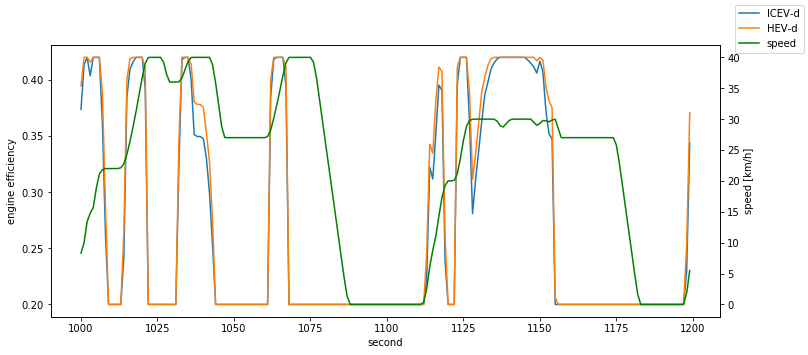

In [35]:
fig, ax = plt.subplots(figsize=(12,5), 
                        nrows=1, ncols=1, sharey=True     # fix as above
                        #gridspec_kw=dict(hspace=0.4)
                       ) # Much control of gridspec

ax.plot(
    tm.energy.sel(powertrain="ICEV-d",
                       year=2020,
                       value=0,
                      size="40t",
                       parameter="engine efficiency",
                       second=range(1000,1200))\
    .to_dataframe("val").unstack()["val"].T,
    label="ICEV-d"
)

ax.plot(
    tm.energy.sel(powertrain="HEV-d",
                       year=2020,
                       value=0,
                      size="40t",
                       parameter="engine efficiency",
                       second=range(1000,1200))\
    .to_dataframe("val").unstack()["val"].T,
    label="HEV-d"
)

ax2 = ax.twinx()

ax2.plot(range(1000, 1200),cycle[1000:1200, 5], c="g", label="speed")

fig.legend(loc=0)

ax.set_ylabel("engine efficiency")
ax2.set_ylabel("speed [km/h]")
ax.set_xlabel("second")

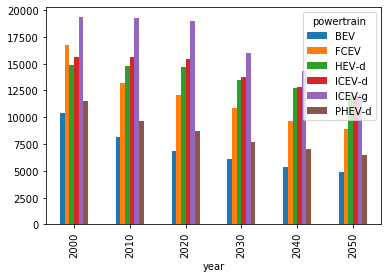

In [5]:
tm.array.sel(size="40t", parameter="TtW energy", value=0).to_dataframe("val").unstack()["val"].T.plot(kind="bar")

In [11]:
ic = InventoryCalculation(tm)
res = ic.calculate_impacts()

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 17.0%, GHG intensity per kWh: 530 g. CO2-eq.
 	 * in 2010, % of renewable: 28.0%, GHG intensity per kWh: 421 g. CO2-eq.
 	 * in 2020, % of renewable: 39.0%, GHG intensity per kWh: 344 g. CO2-eq.
 	 * in 2030, % of renewable: 45.0%, GHG intensity per kWh: 286 g. CO2-eq.
 	 * in 2040, % of renewable: 51.0%, GHG intensity per kWh: 239 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 209 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 1.0%
 	 * in 2020 _________________________________________ 2.0%
 	 * in 2030 _________________________________________ 6.0%
 	 * in 2040 _________________________________________ 8.0%
 	 * in 2050 _________________________________

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


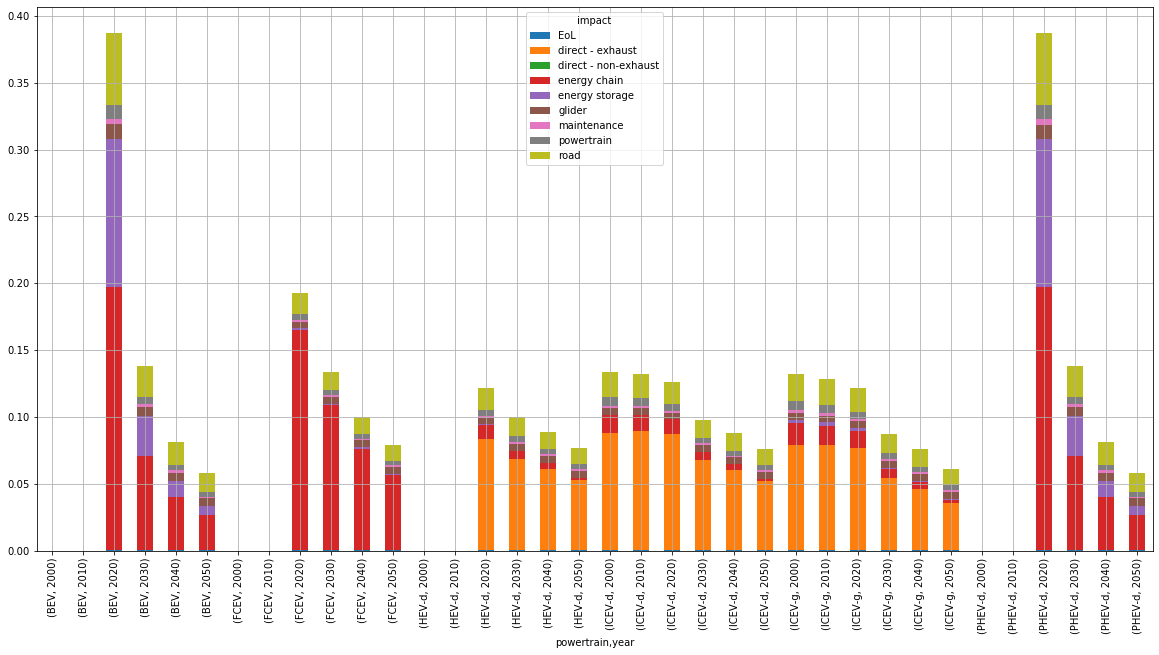

In [12]:
import matplotlib.pyplot as plt
res.sel(impact_category="climate change", size="40t", value=0).to_dataframe("val").unstack()["val"]\
    .plot(kind="bar", stacked=True, figsize=(20, 10))
plt.grid()

In [1]:
from carculator_truck import *

In [2]:
tip = TruckInputParameters()
tip.static()
#tip.stochastic(5)
_, array = fill_xarray_from_input_parameters(tip)
tm = TruckModel(array, cycle="Long haul", country="CH")

Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 32t  | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.42 | 0.38 | 0.6  | 0.36 | 0.36 | 0.36 | 0.41 |
|   BEV, 2010    | 0.42 | 0.38 | 0.6  | 0.36 | 0.36 | 0.36 | 0.41 |
|   BEV, 2020    | 0.42 | 0.38 | 0.6  | 0.36 | 0.36 | 0.36 | 0.41 |
|   BEV, 2030    | 0.42 | 0.38 | 0.6  | 0.36 | 0.36 | 0.36 | 0.41 |
|   BEV, 2040    | 0.42 | 0.38 | 0.6  | 0.36 | 0.36 | 0.36 | 0.41 |
|   BEV, 2050    | 0.42 | 0.38 | 0.6  | 0.36 | 0.36 | 0.36 | 0.41 |
|   FCEV, 2000   | 0.42 | 0.38 | 0.6  | 0.36 | 0.36 | 0.36 | 0.41 |
|   FCEV, 2010   | 0.42 | 0.38 | 0.6  | 0.36 | 0.36 | 0.36 | 0.41 |
|   FCEV, 2020   | 0.42 | 0.38 | 0.6  | 0.36 | 0.36 | 0.36 | 0.41 |
|   FCEV, 2030   | 

In [7]:
tm["driving mass"]=40000
ecm = EnergyConsumptionModel("Urban delivery")
roll, air, grad, inertia, brake, recup, power = ecm.motive_energy_per_km(
    driving_mass=tm["driving mass"],
            rr_coef=tm["rolling resistance coefficient"],
            drag_coef=tm["aerodynamic drag coefficient"],
            frontal_area=tm["frontal area"],
            ttw_efficiency=tm["TtW efficiency"],
            recuperation_efficiency=tm["recuperation efficiency"],
            motor_power=tm["electric power"],
    debug_mode=True
)

In [61]:
tm.array.coords["powertrain"]

<xarray.DataArray 'powertrain' (powertrain: 8)>
array(['BEV', 'FCEV', 'HEV-d', 'ICEV-d', 'ICEV-g', 'PHEV-c-d', 'PHEV-d',
       'PHEV-e'], dtype='<U8')
Coordinates:
  * powertrain  (powertrain) <U8 'BEV' 'FCEV' 'HEV-d' ... 'PHEV-d' 'PHEV-e'

In [62]:
tm.array.coords

Coordinates:
  * size        (size) <U4 '18t' '26t' '3.5t' '32t' '40t' '60t' '7.5t'
  * powertrain  (powertrain) <U8 'BEV' 'FCEV' 'HEV-d' ... 'PHEV-d' 'PHEV-e'
  * parameter   (parameter) <U48 'Acetaldehyde direct emissions, rural' ... '...
  * year        (year) int32 2000 2010 2020 2030 2040 2050
  * value       (value) int32 0

In [63]:
power.shape

(3413, 6, 8, 7)

No handles with labels found to put in legend.


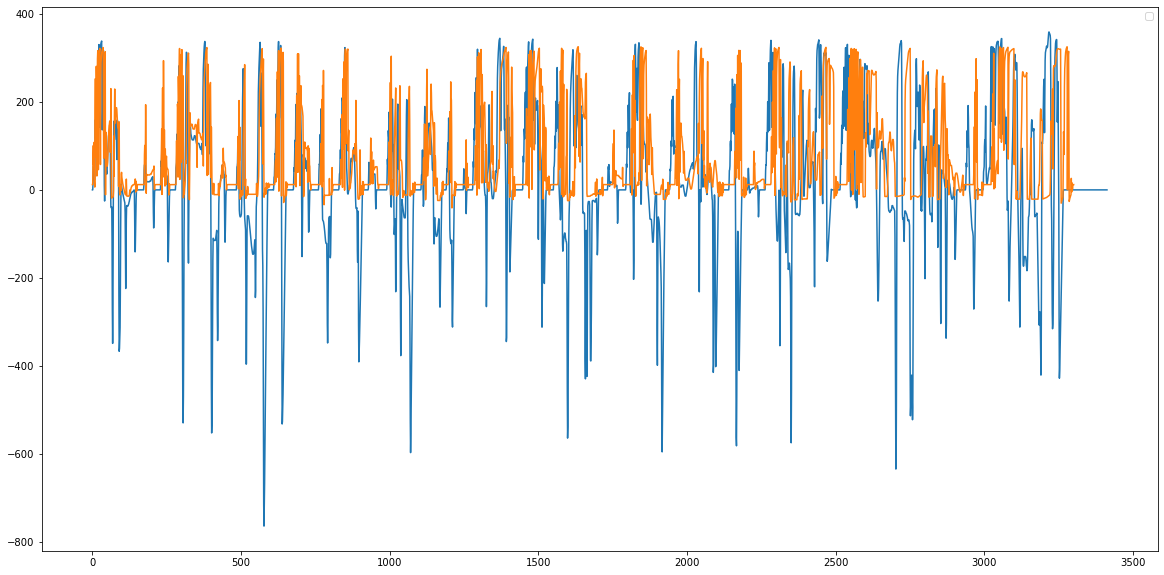

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(power[:, 0, 3, 4]-brake[:, 0, 3, 4])
plt.plot(df_40.loc[:,"P_eng_fcmap [kW]"])
#roll[:, 2, 0, 0].plot(label="rolling")
#air[:, 2, 0, 0].plot(label="air")
#grad[:, 2, 0, 0].plot(label="grad")
#inertia[:, 2, 0, 0].plot(label="inertia")
#brake[:, 2, 0, 0].plot(label="brake")
#recup[:, 2, 0, 0].plot(label="recup")
plt.legend()

In [12]:
len(df_40.loc[:,"engine_eff"])

3301

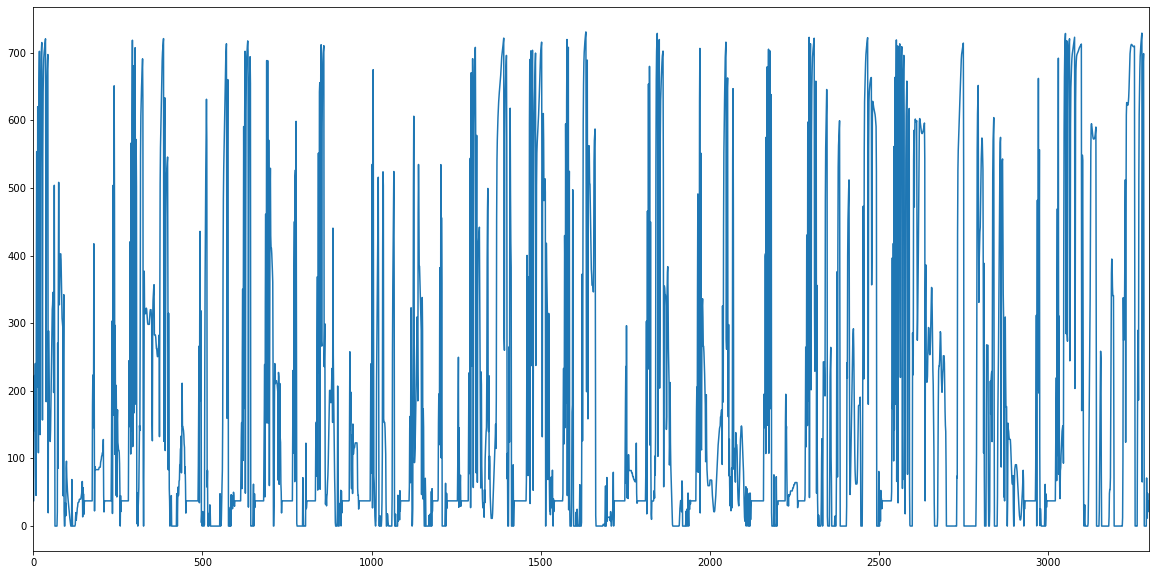

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
df_40 = pd.read_csv(r'C:\Users\sacchi_r\Documents\GitHub\carculator_truck\dev\Class5_Tractor_ENG_400_Urban_delivery_1Hz_full.vmod',
                 sep=",", header=1)

df_40["fuel power [kW]"] = df_40["FC-Final [g/h]"]/3600*42

df_40["fuel power [kW]"].plot()

(0, 1)

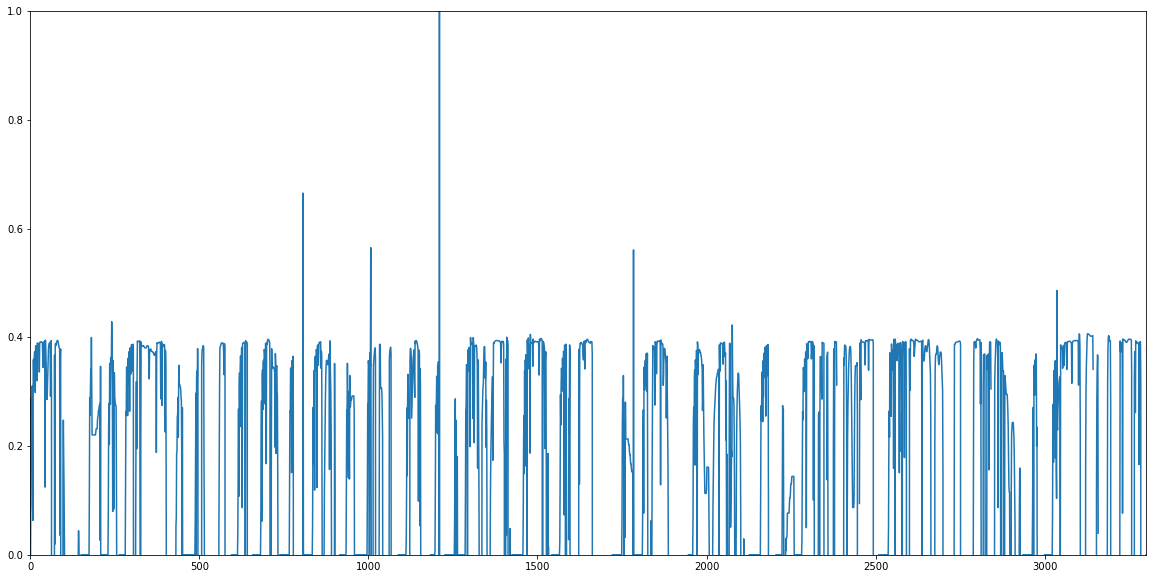

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
df_40 = pd.read_csv(r'C:\Users\sacchi_r\Documents\GitHub\carculator_truck\dev\Class5_Tractor_ENG_400_Urban_delivery_1Hz_full.vmod',
                 sep=",", header=1)

df_40["fuel power [kW]"] = df_40["FC-Final [g/h]"]/3600*42
(df_40["P_brake_in [kW]"]/df_40["fuel power [kW]"]).plot()
plt.ylim(0,1)

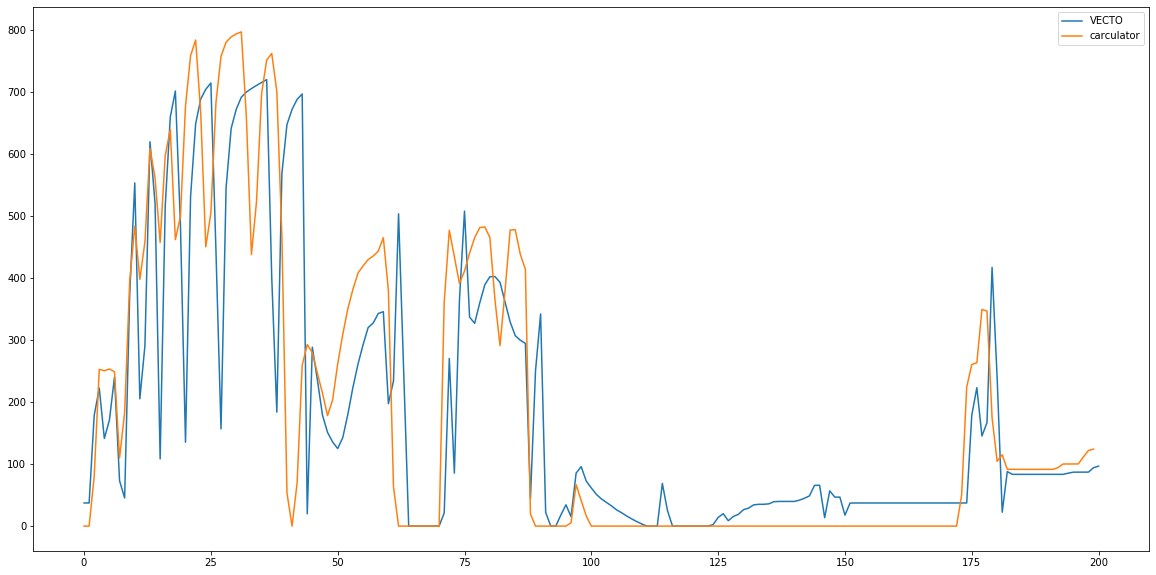

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df_40 = pd.read_csv(r'C:\Users\sacchi_r\Documents\GitHub\carculator_truck\dev\Class5_Tractor_ENG_400_Urban_delivery_1Hz_full.vmod',
                 sep=",", header=1)
plt.rcParams["figure.figsize"] = (20,10)
df_40["fuel power [kW]"] = df_40["FC-Final [g/h]"]/3600*42
df_40["engine_eff"] = df_40["P_eng_fcmap [kW]"]/df_40["fuel power [kW]"]
#plt.plot(df_40.loc[:200,"engine_eff"], label="VECTO")
plt.plot(df_40.loc[:200,"fuel power [kW]"], label="VECTO")
plt.plot(tm.energy.sel(powertrain="ICEV-d",
                       size="40t",
                       year=2020,
                       value=0,
                       parameter="motive energy",
                      second=range(0, 200)), label="carculator")
#plt.ylim(0, 1)
plt.legend()

In [21]:
df_40.columns

Index(['time [s]', 'dt [s]', 'dist [m]', 'v_act [km/h]', 'v_targ [km/h]',
       'acc [m/s^2]', 'grad [%]', 'Gear [-]', 'n_eng_avg [1/min]',
       'T_eng_fcmap [Nm]', 'Tq_full [Nm]', 'Tq_drag [Nm]', 'P_eng_fcmap [kW]',
       'P_eng_full [kW]', 'P_eng_full_stat [kW]', 'P_eng_drag [kW]',
       'P_eng_inertia [kW]', 'P_eng_out [kW]', 'P_clutch_loss [kW]',
       'P_clutch_out [kW]', 'P_aux [kW]', 'P_gbx_in [kW]', 'P_gbx_loss [kW]',
       'P_gbx_inertia [kW]', 'P_ret_in [kW]', 'P_ret_loss [kW]',
       'P_angle_in [kW]', 'P_angle_loss [kW]', 'P_axle_in [kW]',
       'P_axle_loss [kW]', 'P_brake_in [kW]', 'P_brake_loss [kW]',
       'P_wheel_in [kW]', 'P_wheel_inertia [kW]', 'P_trac [kW]',
       'P_slope [kW]', 'P_air [kW]', 'P_roll [kW]', 'P_veh_inertia [kW]',
       'n_gbx_out_avg [1/min]', 'T_gbx_out [Nm]', 'P_aux_CYCLE',
       'P_aux_CONSTANTAUX', 'FC-Map [g/h]', 'FC-NCVc [g/h]', 'FC-WHTCc [g/h]',
       'FC-AAUX [g/h]', 'FC-ADAS [g/h]', 'FC-Final [g/h]', 'fuel power [kW]',
      

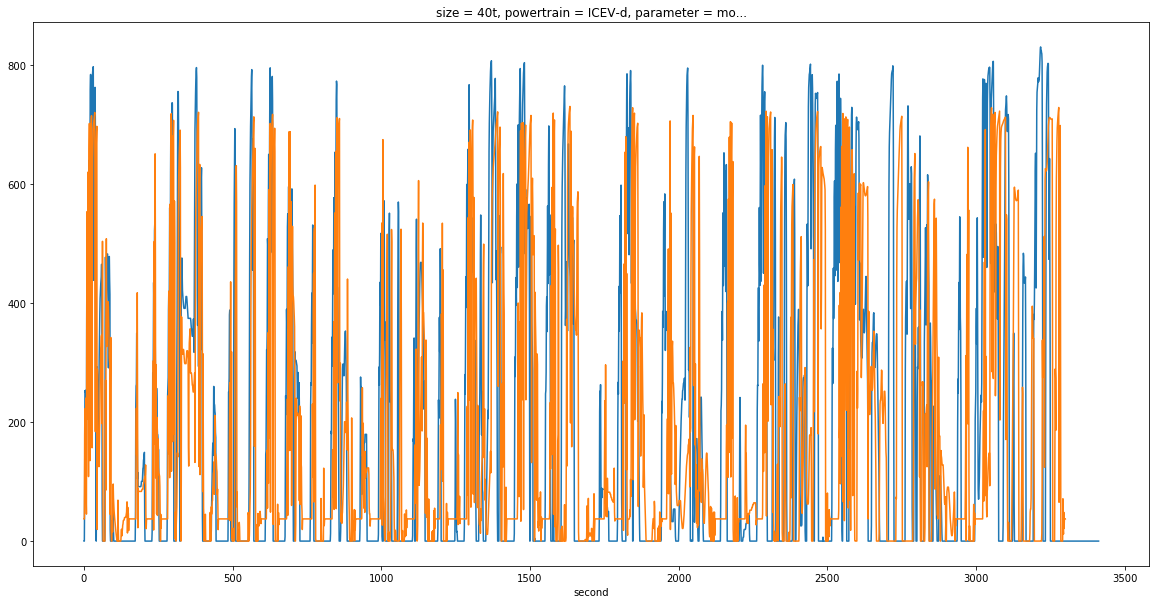

In [28]:
tm.energy.sel(powertrain="ICEV-d", size="40t", year=2020, value=0, parameter="motive energy").plot()
df_40["fuel power [kW]"] = df_40["FC-Final [g/h]"]/3600*42
plt.plot(df_40["fuel power [kW]"])

In [29]:
tm.energy.sel(powertrain="ICEV-d", size="40t", year=2020, value=0, parameter="motive energy").sum(dim="second")

<xarray.DataArray ()>
array(631789.6, dtype=float32)
Coordinates:
    size        <U4 '40t'
    powertrain  <U8 'ICEV-d'
    parameter   <U23 'motive energy'
    year        int32 2020
    value       int32 0

In [31]:
df_40["fuel power [kW]"].sum()

618274.1022884999

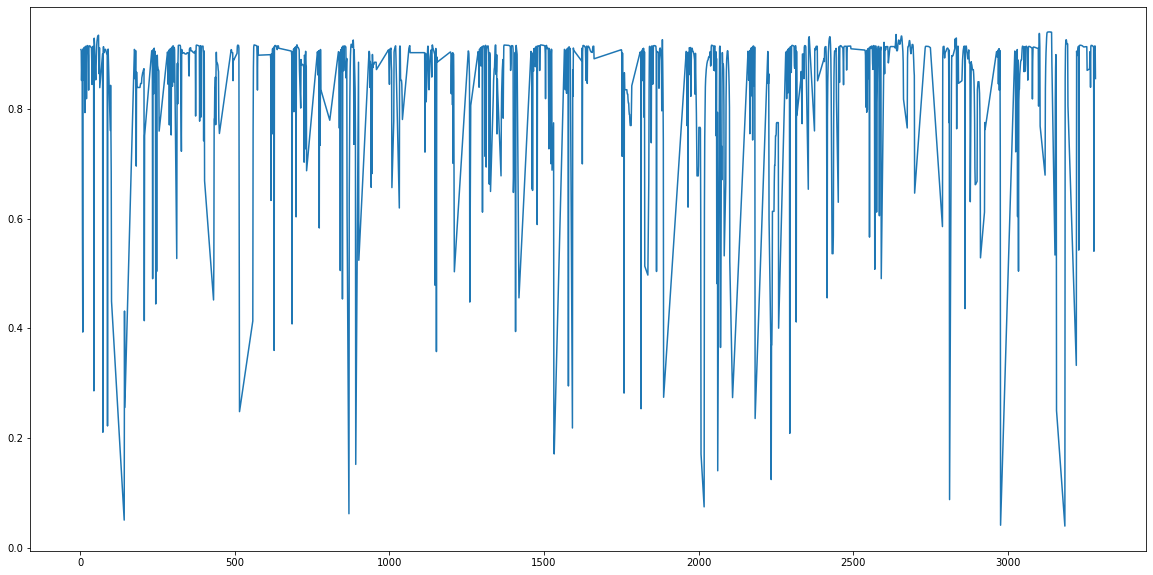

In [23]:
plt.rcParams["figure.figsize"] = (20,10)
df_40["drivetrain_eff"] = df_40["P_brake_in [kW]"]/df_40["P_gbx_in [kW]"]
plt.plot(df_40.loc[(df_40["drivetrain_eff"]<1)&(df_40["drivetrain_eff"]>0),"drivetrain_eff"])

In [24]:
total_eff = df_40["engine_eff"] * df_40["drivetrain_eff"]

(0, 1)

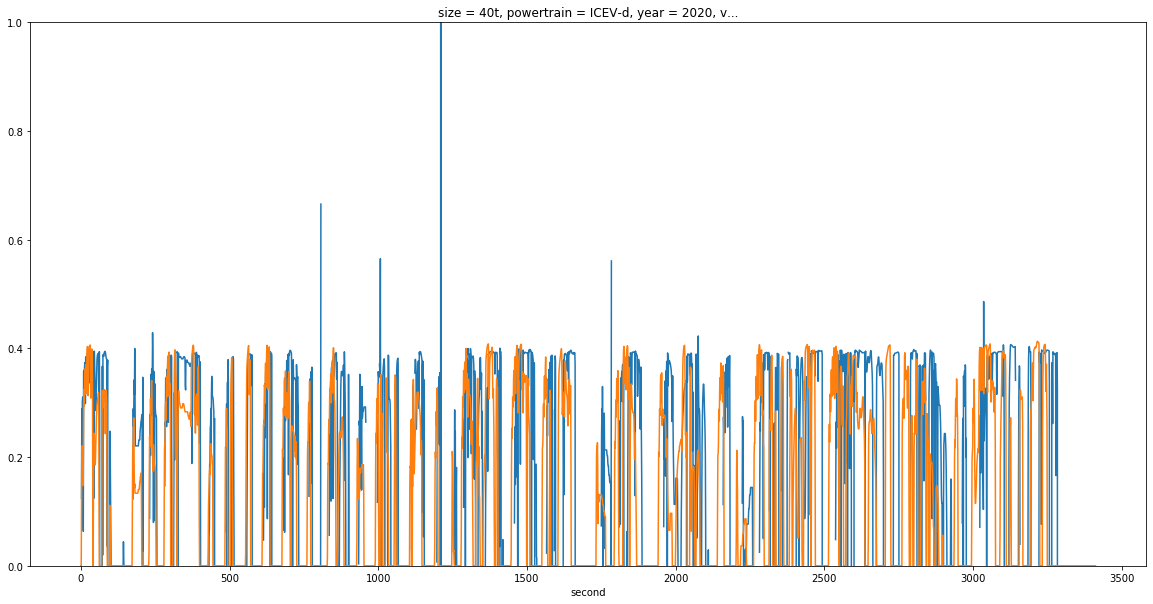

In [31]:
plt.plot(total_eff)
(tm.energy.loc[dict(parameter="transmission efficiency", powertrain="ICEV-d", size="40t", year=2020, value=0)] *
                tm.energy.loc[dict(parameter="engine efficiency", powertrain="ICEV-d", size="40t", year=2020, value=0)]).plot()
plt.ylim(0,1)

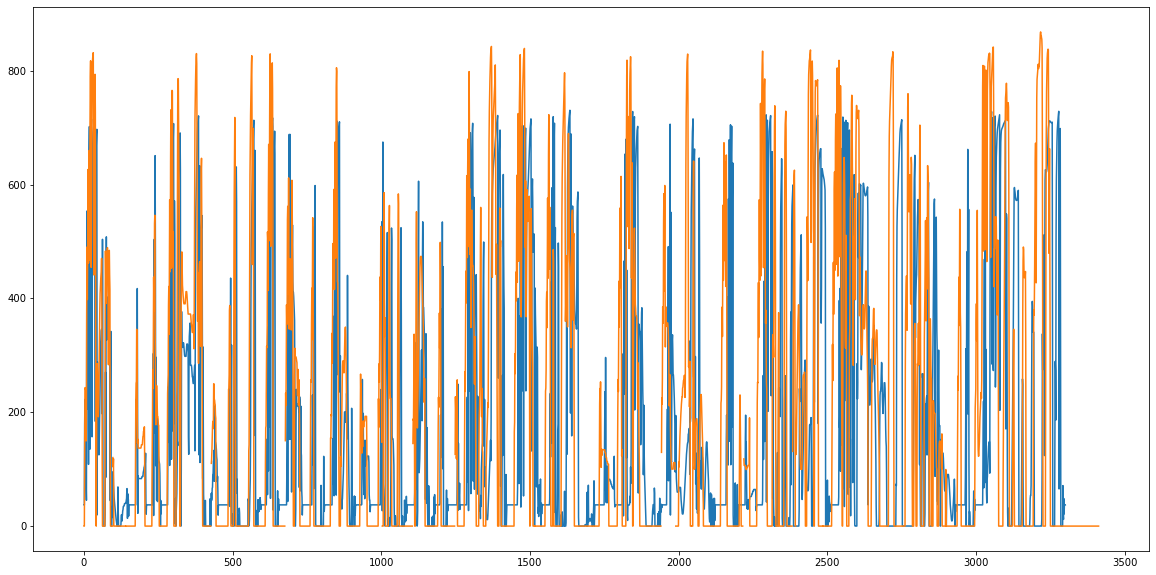

In [35]:
plt.plot(df_40["fuel power [kW]"])
plt.plot(tm.energy.loc[dict(parameter="motive energy", powertrain="ICEV-d", size="40t", year=2020, value=0)])

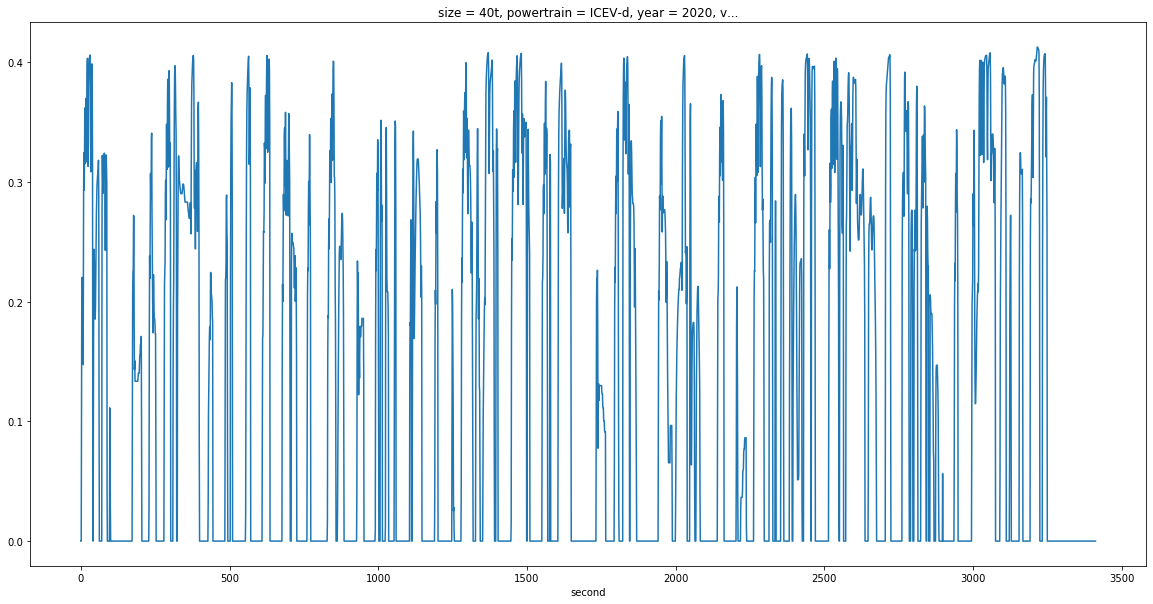

In [30]:
(tm.energy.loc[dict(parameter="transmission efficiency", powertrain="ICEV-d", size="40t", year=2020, value=0)] *
                tm.energy.loc[dict(parameter="engine efficiency", powertrain="ICEV-d", size="40t", year=2020, value=0)]).plot()

In [95]:
import numpy as np
cycle = get_standard_driving_cycle("Long haul")

In [96]:
cycle.shape

(5825, 7)

In [97]:
(cycle==0).sum(axis=0)

array([868, 762, 698, 446, 729, 602, 241])

In [75]:
velocity = (cycle * 1000) / 3600

In [76]:
acceleration = np.zeros_like(velocity)
acceleration[1:-1] = (velocity[2:] - velocity[:-2]) / 2

In [77]:
distance = velocity.sum(axis=0)/ 1000

In [78]:
distance

array([108.19305556, 109.32825992, 108.27256594, 108.32449431,
       108.19061492, 108.22262117, 108.19312975])

In [79]:
velocity[velocity==0]=np.nan

In [80]:
np.nanmean(velocity, axis=0)

array([21.82631744, 21.59357296, 21.11811312, 20.13840757, 21.23049743,
       20.72039463, 19.37556049])

In [81]:
acceleration[acceleration<=0] = np.nan

In [82]:
np.nanmean(acceleration, axis=0)

array([0.54409385, 0.56076293, 0.1927888 , 0.17171959, 0.18850836,
       0.19080446, 0.13209004])